In [1]:
# prompt: need to mount to drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/emotion_tts/emotionTransfer

/content/drive/MyDrive/emotion_tts/emotionTransfer


In [3]:
!pip install virtualenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 50.1 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py"

In [ ]:
!virtualenv myenv


created virtual environment CPython3.10.12.final.0-64 in 21391ms
  creator CPython3Posix(dest=/content/drive/MyDrive/emotion_tts/emotionTransfer/myenv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==24.0, setuptools==69.5.1, wheel==0.43.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [4]:
!source myenv/bin/activate


In [3]:
!pip install nemo-toolkit[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.3/92.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.0/725.0 kB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 74.5 M

In [4]:
# Load FastPitch
from nemo.collections.tts.models import FastPitchModel
spec_generator = FastPitchModel.from_pretrained("nvidia/tts_en_fastpitch")
spec_generator.eval()

# Load vocoder
from nemo.collections.tts.models import HifiGanModel
model = HifiGanModel.from_pretrained(model_name="nvidia/tts_hifigan")
model.eval()

# import soundfile as sf
# parsed = spec_generator.parse("You can type your sentence here to get nemo to produce speech.")
# spectrogram = spec_generator.generate_spectrogram(tokens=parsed)
# audio = model.convert_spectrogram_to_audio(spec=spectrogram)


[NeMo W 2024-04-29 03:54:36 nemo_logging:349] /usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
      self.pid = os.fork()
    
[NeMo W 2024-04-29 03:54:45 nemo_logging:349] /usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
    The secret `HF_TOKEN` does not exist in your Colab secrets.
    To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
    You will be able to reuse this secret in all of your notebooks.
    Please note that authentication is recommended but still optional to access public models or datasets.
      warnings.warn(
    


tts_en_fastpitch.nemo:   0%|          | 0.00/187M [00:00<?, ?B/s]

 NeMo-text-processing :: INFO     :: Creating ClassifyFst grammars.
INFO:NeMo-text-processing:Creating ClassifyFst grammars.
[NeMo W 2024-04-29 03:55:20 en_us_arpabet:66] apply_to_oov_word=None, This means that some of words will remain unchanged if they are not handled by any of the rules in self.parse_one_word(). This may be intended if phonemes and chars are both valid inputs, otherwise, you may see unexpected deletions in your input.
[NeMo W 2024-04-29 03:55:20 modelPT:165] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.torch.data.TTSDataset
      manifest_filepath: /ws/LJSpeech/nvidia_ljspeech_train_clean_ngc.json
      sample_rate: 22050
      sup_data_path: /raid/LJSpeech/supplementary
      sup_data_types:
      - align_prior_matrix
      - pitch
      n_fft: 1024
      win_length: 1024
  

[NeMo I 2024-04-29 03:55:21 features:289] PADDING: 1
[NeMo I 2024-04-29 03:55:22 save_restore_connector:249] Model FastPitchModel was successfully restored from /root/.cache/huggingface/hub/models--nvidia--tts_en_fastpitch/snapshots/2c8305b7b41b33fd6367f0635796dc3a7a33cbf9/tts_en_fastpitch.nemo.


tts_hifigan.nemo:   0%|          | 0.00/315M [00:00<?, ?B/s]

[NeMo W 2024-04-29 03:55:26 modelPT:165] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/train_finetune.txt
      min_duration: 0.75
      n_segments: 8192
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 64
      num_workers: 4
    
[NeMo W 2024-04-29 03:55:26 modelPT:172] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/val_finetune.txt
      min_duration: 3
      n_segments: 66150


[NeMo I 2024-04-29 03:55:26 features:289] PADDING: 0


[NeMo W 2024-04-29 03:55:26 features:266] Using torch_stft is deprecated and has been removed. The values have been forcibly set to False for FilterbankFeatures and AudioToMelSpectrogramPreprocessor. Please set exact_pad to True as needed.


[NeMo I 2024-04-29 03:55:26 features:289] PADDING: 0


[NeMo W 2024-04-29 03:55:26 nemo_logging:349] /usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
      warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
    


[NeMo I 2024-04-29 03:55:27 save_restore_connector:249] Model HifiGanModel was successfully restored from /root/.cache/huggingface/hub/models--nvidia--tts_hifigan/snapshots/3ba1fed954276287015654bf4c78060ffc9a4772/tts_hifigan.nemo.


HifiGanModel(
  (audio_to_melspec_precessor): FilterbankFeatures()
  (trg_melspec_fn): FilterbankFeatures()
  (generator): Generator(
    (conv_pre): Conv1d(80, 512, kernel_size=(7,), stride=(1,), padding=(3,))
    (ups): ModuleList(
      (0): ConvTranspose1d(512, 256, kernel_size=(16,), stride=(8,), padding=(4,))
      (1): ConvTranspose1d(256, 128, kernel_size=(16,), stride=(8,), padding=(4,))
      (2): ConvTranspose1d(128, 64, kernel_size=(4,), stride=(2,), padding=(1,))
      (3): ConvTranspose1d(64, 32, kernel_size=(4,), stride=(2,), padding=(1,))
    )
    (resblocks): ModuleList(
      (0): ModuleList(
        (0): ResBlock1(
          (convs1): ModuleList(
            (0): Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=(1,))
            (1): Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=(3,), dilation=(3,))
            (2): Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=(5,), dilation=(5,))
          )
          (convs2): ModuleList(
            (0

In [ ]:
import os
import numpy as np
import pandas as pd
import torch
from nemo.collections.tts.models import FastPitchModel, HifiGanModel
import soundfile as sf
import whisper

# Load the FastPitch model
spec_generator = FastPitchModel.from_pretrained("nvidia/tts_en_fastpitch")
spec_generator.eval()

# Load the HifiGan vocoder
vocoder = HifiGanModel.from_pretrained(model_name="nvidia/tts_hifigan")
vocoder.eval()

sentences = [
    "Your constant negativity is exhausting to everyone around you!",
    "How could you be so careless with something so important?",
    "I'm tired of you always pointing the blame elsewhere!",
    "Stop interrupting me; it's disrespectful and annoying!",
    "You've messed this up completely, and I'm furious!",
    "I can't just sit back and watch you ruin everything!",
    "Your arrogance is making this situation worse!",
    "I will not allow you to speak to me that way!",
    "It’s unacceptable to ignore my requests repeatedly!",
    "You always promise to change, but I see no effort!",
    "I’m at my limit with your excuses and delays!",
    "You never take my concerns seriously, and it's infuriating!",
    "This is the last straw; I've had enough of your lies!",
    "You think you're helping, but you're just making things harder!",
    "Every time you dismiss my ideas, my frustration grows!",
    "Your stubbornness is blocking any progress!",
    "I just feel so lost without them around anymore.",
    "The days are long and lonely without your laughter.",
    "I keep hoping you'll come back, even though I know you won't.",
    "It's like there's a constant cloud hanging over me now.",
    "The world has lost its color since you left.",
    "I'm just going through the motions, feeling empty inside.",
    "Sometimes the sadness is so deep, it's hard to breathe.",
    "I miss the comfort of our old conversations.",
    "It hurts to think I might never hear your voice again.",
    "There's a silence in my heart where you used to be.",
    "These walls echo with memories of better times.",
    "I thought time would heal, but it just deepens the ache.",
    "Every morning I wake up to the reality of your absence.",
    "I've never felt so alone as I do without you.",
    "The emptiness is overwhelming, like a wave that never recedes.",
    "My world feels smaller and colder without your presence.",
    "I just got the best news ever, and I can’t wait to share it!",
    "Seeing you succeed brings me so much joy and pride!",
    "This is exactly what we've been hoping for!",
    "Your good vibes are absolutely infectious!",
    "We have so much to be thankful for today!",
    "I love seeing our plans coming together beautifully!",
    "There's nothing better than sharing these moments with you.",
    "I feel so energized and happy right now!",
    "We really nailed it this time; what a triumph!",
    "It's such a beautiful day to celebrate our victories!",
    "Your happiness makes my heart feel so full.",
    "I can't help but smile every time I think about it.",
    "We turned our dreams into reality!",
    "This is one of the happiest days of my life.",
    "I'm just overwhelmed with happiness today!",
    "Everything just feels right and perfect.",
    "I had no idea you were planning this for me!",
    "This is far beyond what I ever expected!",
    "You really went above and beyond this time!",
    "I'm genuinely shocked by how well this turned out!",
    "This outcome is a complete surprise to all of us!",
    "I wasn't expecting any of this at all!",
    "You've truly outdone yourself with this surprise!",
    "I'm amazed by your thoughtfulness and creativity.",
    "This twist was completely unexpected!",
    "You've surprised me in ways I couldn't imagine!",
    "I had no clue this was coming!",
    "How did you manage to keep this a secret?",
    "This is an unbelievable turn of events!",
    "I never thought I’d see the day this would happen!",
    "You caught me totally off guard—in a good way!",
    "This is the best surprise ever!",
    "I'm worried this might be more than we can handle.",
    "There’s something unsettling about this quiet.",
    "I’m not sure why, but this feels like a bad sign.",
    "The thought of going there alone is frightening.",
    "I have a bad feeling about what’s to come.",
    "This uncertainty is scarier than knowing the worst.",
    "I can't help but feel something terrible is about to happen.",
    "The more I think about it, the more scared I get.",
    "Are we really prepared to face what's next?",
    "I fear that we're out of our depth here.",
    "What if our efforts are for nothing?",
    "The silence is more alarming than any warning.",
    "I'm scared that I might lose everything.",
    "Every creak and whisper makes my heart skip.",
    "This could go wrong in so many ways.",
    "I'm terrified of what you might say.",
    "Let's review the facts before making a decision.",
    "It’s just a regular day, nothing special.",
    "We'll see how things unfold, no need to rush.",
    "It’s neither here nor there, just in between.",
    "Let's just keep things straightforward and simple.",
    "I'm here to work, let's focus on that.",
    "It’s just one of those things, nothing major.",
    "We're just talking, no need for emotions.",
    "Just stick to the plan, and we'll be fine.",
    "It's a typical situation; we've dealt with this before.",
    "Let's not make more of this than necessary.",
    "It's an average day, as expected.",
    "We're just doing our jobs, nothing less, nothing more.",
    "Nothing's changed, it's business as usual.",
    "Let's not read too much into this.",
    "We just need to get through the day."
]


spectrogram_output_folder = 'spect_output'
if not os.path.exists(spectrogram_output_folder):
    os.makedirs(spectrogram_output_folder)


df = pd.DataFrame(columns=['Filename', 'Text'])


for index, sentence in enumerate(sentences):
    parsed = spec_generator.parse(sentence)
    spectrogram = spec_generator.generate_spectrogram(tokens=parsed)

    waveform = vocoder.convert_spectrogram_to_audio(spec=spectrogram)
    # we save the waveform and spectogram here
    output_spec_path = os.path.join(spectrogram_output_folder, f'spectrogram_{index + 1}.npy')
    output_waveform_path = os.path.join(spectrogram_output_folder, f'waveform_{index + 1}.wav')

    np.save(output_spec_path, spectrogram.cpu().detach().numpy())
    sf.write(output_waveform_path, waveform.squeeze().cpu().detach().numpy(), 22050)

    df = df._append({'Filename': output_spec_path, 'Text': sentence}, ignore_index=True)

# Save DataFrame to an Excel file
excel_path = os.path.join(spectrogram_output_folder, 'spectrogram_files.xlsx')
df.to_excel(excel_path, index=False)

print("All spectrograms and their waveform files have been generated and saved.")

 NeMo-text-processing :: INFO     :: Creating ClassifyFst grammars.
INFO:NeMo-text-processing:Creating ClassifyFst grammars.


KeyboardInterrupt: 

In [5]:
!pip install openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.6/798.6 kB 17.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 66.1 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20231117-py3-none-any.whl size=801358 sha256=c4c09a2d7c72c18bcb314073f8ccaf09c79538221d70e479494925e9d0a7120a
  Stored in directory: /root/.cache/pip/wheels/d0/85/e1/9361b4cbea7dd4b7f6702fa4c3afc94877952eeb2b62f45f56
Successfully built openai-whisper


In [6]:
%load_ext autoreload
%autoreload 2
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import AutoProcessor, AutoModelForCTC, Wav2Vec2Processor
# from speechbrain.inference.vocoders import HIFIGAN
from transformers import AutoModelForAudioClassification
import torchaudio
import numpy as np
import pandas as pd
import whisper

In [8]:
def custom_activation(x):
    return -10 * torch.sigmoid(x)

In [7]:
class AudioTextEmotionModel(nn.Module):
    def __init__(self, num_emotions, embedding_dim, num_frames):
        super(AudioTextEmotionModel, self).__init__()
        self.num_frames = num_frames

        # Emotion embedding layer
        self.emotion_embedding = nn.Embedding(num_emotions, embedding_dim)

        # Convolutional layers for mel spectrogram input
        self.conv1 = nn.Conv2d(2, 10, kernel_size=(3, 3), padding=(1, 1))
        self.conv2 = nn.Conv2d(10, 5, kernel_size=(5, 5), padding=(2, 2))
        self.conv3 = nn.Conv2d(5, 1, kernel_size=(3, 3), padding=(1, 1))

        self.linear = nn.Linear(160, 80)
        # self.lstm = nn.LSTM(input_size=80, hidden_size=80,
        #                     num_layers=3, batch_first=True)

    def forward(self, audio_input, emotion_idx):
        emotion_embedding = self.emotion_embedding(emotion_idx)
        emotion_repeated = emotion_embedding.unsqueeze(-1).repeat(1, 1, self.num_frames)

        mel_emotion = torch.stack((audio_input, emotion_repeated), dim=1)

        x = F.leaky_relu(self.conv1(mel_emotion))
        # x = x * -1
        x = F.leaky_relu(self.conv2(x))
        # x = x * -1
        x = F.leaky_relu(self.conv3(x))
        # output = F.leaky_relu(self.conv3(x))

        # x = x * -1

        # x = self.conv1(mel_emotion)
        # x = self.conv2(x)
        # output = self.conv3(x)
        x = torch.squeeze(x)

        if not self.training:
            x = torch.unsqueeze(x, 0)

        batch_size, features, time_steps = x.shape
        x = x.permute(0, 2, 1).contiguous().view(batch_size * time_steps, features)

        x = torch.cat((x, emotion_embedding.repeat(1, time_steps).view(batch_size * time_steps, -1)), dim=1)

        # Apply the linear transformation
        x = self.linear(x)

        # Reshape back to [batch_size, features, time_steps]
        x = x.view(batch_size, time_steps, 80).permute(0, 2, 1)

        # x = x.permute(0, 2, 1)
        # x, (hn, cn) = self.lstm(x)
        # x = x.permute(0, 2, 1)

        output = x + audio_input

        return output

In [8]:
# from nemo.collections.tts.models import FastPitchModel
# spec_generator = FastPitchModel.from_pretrained("nvidia/tts_en_fastpitch")
# spec_generator.eval()

import whisper
# # Load vocoder
from nemo.collections.tts.models import HifiGanModel
hifi_gan = HifiGanModel.from_pretrained(model_name="nvidia/tts_hifigan")
hifi_gan.eval()
emotion_rec = AutoModelForAudioClassification.from_pretrained("3loi/SER-Odyssey-Baseline-WavLM-Categorical-Attributes", trust_remote_code=True)

whisper_model = whisper.load_model("base")

mean = emotion_rec.config.mean
std = emotion_rec.config.std


mean_tensor = torch.tensor(mean, requires_grad=True)
std_tensor = torch.tensor(std + 0.000001, requires_grad=True)

[NeMo W 2024-04-29 03:57:16 modelPT:165] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/train_finetune.txt
      min_duration: 0.75
      n_segments: 8192
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 64
      num_workers: 4
    
[NeMo W 2024-04-29 03:57:16 modelPT:172] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/val_finetune.txt
      min_duration: 3
      n_segments: 66150


[NeMo I 2024-04-29 03:57:16 features:289] PADDING: 0


[NeMo W 2024-04-29 03:57:16 features:266] Using torch_stft is deprecated and has been removed. The values have been forcibly set to False for FilterbankFeatures and AudioToMelSpectrogramPreprocessor. Please set exact_pad to True as needed.


[NeMo I 2024-04-29 03:57:16 features:289] PADDING: 0
[NeMo I 2024-04-29 03:57:17 save_restore_connector:249] Model HifiGanModel was successfully restored from /root/.cache/huggingface/hub/models--nvidia--tts_hifigan/snapshots/3ba1fed954276287015654bf4c78060ffc9a4772/tts_hifigan.nemo.


config.json:   0%|          | 0.00/750 [00:00<?, ?B/s]

pipeline_utils.py:   0%|          | 0.00/5.55k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/3loi/SER-Odyssey-Baseline-WavLM-Categorical-Attributes:
- pipeline_utils.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/1.27G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.22k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/wavlm-large were not used when initializing WavLMModel: ['encoder.pos_conv_embed.conv.weight_g', 'encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing WavLMModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing WavLMModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of WavLMModel were not initialized from the model checkpoint at microsoft/wavlm-large and are newly initialized: ['encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and i

In [20]:
num_emotions = 8
embedding_dim = 80
num_frames = 374
lr = 0.01

model = AudioTextEmotionModel(num_emotions, embedding_dim, num_frames)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
model.train()

AudioTextEmotionModel(
  (emotion_embedding): Embedding(8, 80)
  (conv1): Conv2d(2, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(10, 5, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(5, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (linear): Linear(in_features=160, out_features=80, bias=True)
)

In [10]:
emotion_criterion = nn.CrossEntropyLoss()
num_epochs = 50

In [22]:
emotion_rec.cuda()
whisper_model.cuda()
emotion_rec.eval()
whisper_model.eval()
model.cuda()

AudioTextEmotionModel(
  (emotion_embedding): Embedding(8, 80)
  (conv1): Conv2d(2, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(10, 5, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(5, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (linear): Linear(in_features=160, out_features=80, bias=True)
)

In [13]:
import gc
gc.collect()

2106

In [12]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import torch
with torch.no_grad():
  from data_loader import get_train_loader  # Assuming your dataset handling is correct as discussed

# Load data and prepare paths and labels
df = pd.read_excel('spect_output/spectrogram_files.xlsx')
audio_paths = df['Filename'].tolist()
emotion_labels = np.random.randint(0, 6, size=len(audio_paths))  # Example: Random labels, replace with actual data
max_length = max([np.load(path).shape[-1] for path in audio_paths])  # Ensure dimension indexing is correct
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_loader = get_train_loader(audio_paths, emotion_labels, max_length, device)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Spectrogram batch shape: torch.Size([8, 80, 374])
Features batch shape: torch.Size([8, 768000])
Emotion labels shape: torch.Size([8])


In [23]:
# from data_loader import get_train_loader

epoch_losses = []
emotion_losses = []
content_losses = []
mse_losses = []
accuracies = []

for epoch in range(num_epochs):
    total_loss = 0
    total_content_loss = 0
    total_emotion_loss = 0
    total_mse_loss = 0
    correct_predictions = 0
    total_predictions = 0

    for spectrograms, target_features, emotions in train_loader:
        optimizer.zero_grad()

        # print(audio_input.device)
        # print(emotion_input.device)
        # print(next(model.parameters()).device)

        spectrograms = spectrograms.cuda()
        emotions = emotions.cuda()
        target_features = target_features.cuda()

        output = model(spectrograms, emotions)
        output = torch.squeeze(output).cuda()
        # print("Output Done ", end="")
        # print(output.shape)

        mse_loss = F.mse_loss(output, spectrograms)
        total_mse_loss += mse_loss.item()
        # print(f"MSE Loss: {mse_loss}")

        padded_output = F.pad(output, (0, 3000-num_frames)).cuda()
        features = whisper_model.encoder(padded_output)
        features = torch.flatten(features, start_dim=1, end_dim=2).cuda()

        content_loss_tensor = F.cosine_similarity(features, target_features, dim=-1)
        content_loss = (1.0 / torch.mean(content_loss_tensor)) - 1.0
        total_content_loss += content_loss.item()
        # print(f"Content Loss: {content_loss}")

        waveforms = hifi_gan.convert_spectrogram_to_audio(spec=output)
        waveforms = torch.squeeze(waveforms).cuda()
        #  waveforms = waveforms.unsqueeze(1)
        # print("Waveforms Done ", end="")
        # print(waveforms.shape)

        norm_wav = (waveforms - mean) / (std)
        mask = torch.ones(norm_wav.shape).cuda()

        # with torch.no_grad():
        pred = emotion_rec(norm_wav.cuda(), mask)

        # probabilities = torch.nn.functional.softmax(pred, dim=1)
        # print("Emotion Rec Done ", end="")
        # print(probabilities.shape)


        emotion_loss = emotion_criterion(pred, emotions)

        _, predicted_labels = torch.max(pred, 1)  # Get the predicted labels
        correct_predictions += (predicted_labels == emotions).sum().item()
        total_predictions += emotions.size(0)

        total_emotion_loss += emotion_loss.item()
        loss = 3.0 * emotion_loss + 45 * content_loss # + 0.3 * mse_loss
        # loss = content_loss
        # loss.requires_grad = True
        loss.backward()

        # for name, param in model.named_parameters():
        #     print(name, param.grad)

        # for name, param in hifi_gan.named_parameters():
        #     print(name, param.grad)

        optimizer.step()

        total_loss += loss.item()

        # print(f"Total Loss: {total_loss}")
        # print(f"Total Emotion Loss: {total_emotion_loss}")
        # print(f"Total Content Loss: {total_content_loss}")

    avg_loss = total_loss / len(train_loader)
    avg_accuracy = correct_predictions / total_predictions
    avg_emotion_loss = total_emotion_loss / len(train_loader)
    avg_content_loss = total_content_loss / len(train_loader)
    avg_mse_loss = total_mse_loss / len(train_loader)
    epoch_losses.append(avg_loss)
    emotion_losses.append(total_emotion_loss / len(train_loader))
    content_losses.append(total_content_loss / len(train_loader))
    mse_losses.append(total_mse_loss / len(train_loader))
    accuracies.append(avg_accuracy)
    print(f"Epoch [{epoch+1}/{num_epochs}], Avg. Emotion Loss: {avg_emotion_loss:.4f}")
    print(f"Epoch [{epoch+1}/{num_epochs}], Avg. Content Loss: {avg_content_loss:.4f}")
    print(f"Epoch [{epoch+1}/{num_epochs}], Avg. MSE Loss: {avg_mse_loss:.4f}")
    print(f"Epoch [{epoch+1}/{num_epochs}], Avg. Loss: {avg_loss:.4f}")
    print(f"Epoch [{epoch+1}/{num_epochs}], Avg. Accuracy: {avg_accuracy:.4f}")

Epoch [1/50], Avg. Emotion Loss: 2.0994
Epoch [1/50], Avg. Content Loss: 0.0645
Epoch [1/50], Avg. MSE Loss: 0.7365
Epoch [1/50], Avg. Loss: 9.1994
Epoch [1/50], Avg. Accuracy: 0.2396
Epoch [2/50], Avg. Emotion Loss: 1.8659
Epoch [2/50], Avg. Content Loss: 0.0994
Epoch [2/50], Avg. MSE Loss: 1.8922
Epoch [2/50], Avg. Loss: 10.0728
Epoch [2/50], Avg. Accuracy: 0.3021
Epoch [3/50], Avg. Emotion Loss: 1.8694
Epoch [3/50], Avg. Content Loss: 0.1038
Epoch [3/50], Avg. MSE Loss: 2.4843
Epoch [3/50], Avg. Loss: 10.2784
Epoch [3/50], Avg. Accuracy: 0.3542
Epoch [4/50], Avg. Emotion Loss: 1.7594
Epoch [4/50], Avg. Content Loss: 0.1189
Epoch [4/50], Avg. MSE Loss: 3.2453
Epoch [4/50], Avg. Loss: 10.6269
Epoch [4/50], Avg. Accuracy: 0.3542
Epoch [5/50], Avg. Emotion Loss: 1.6892
Epoch [5/50], Avg. Content Loss: 0.1179
Epoch [5/50], Avg. MSE Loss: 3.6700
Epoch [5/50], Avg. Loss: 10.3719
Epoch [5/50], Avg. Accuracy: 0.3750
Epoch [6/50], Avg. Emotion Loss: 1.5740
Epoch [6/50], Avg. Content Loss: 0.1

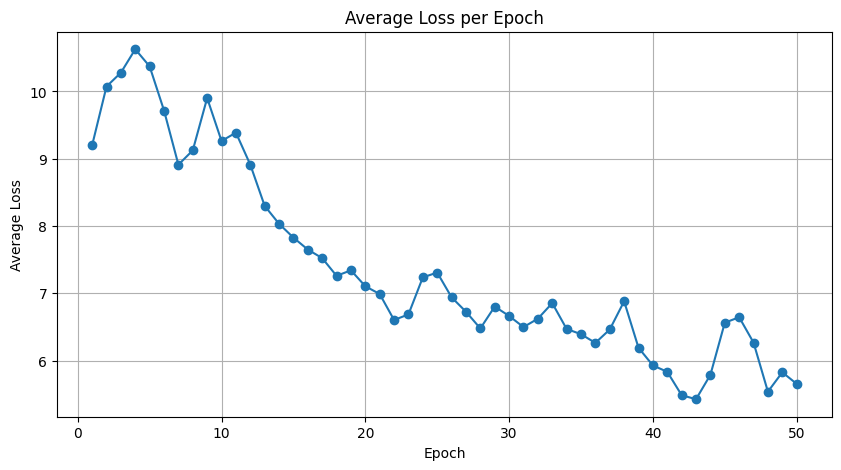

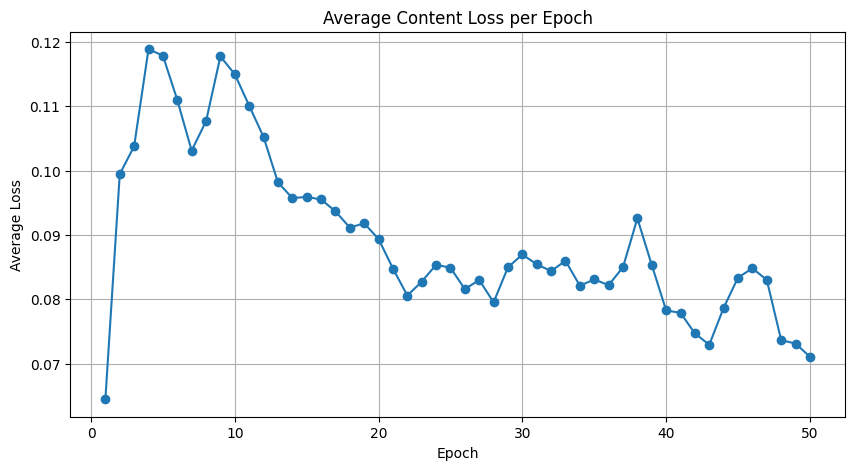

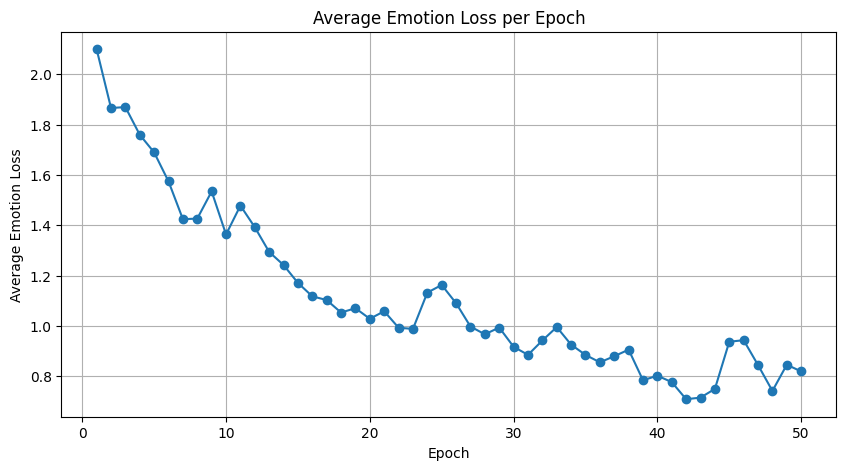

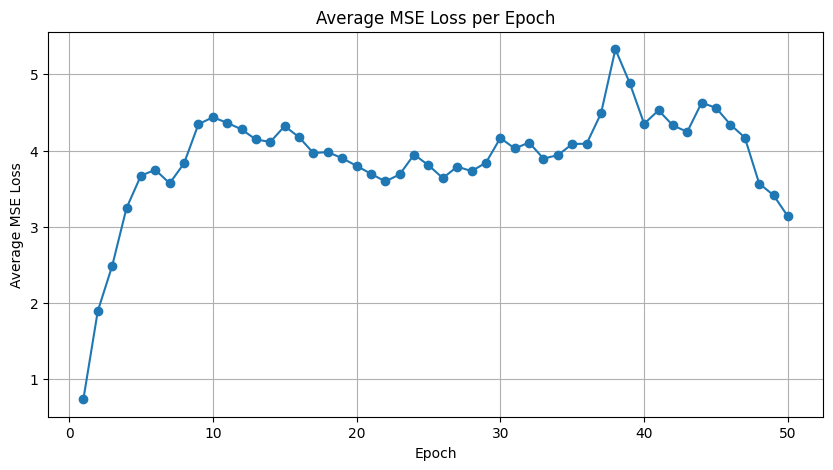

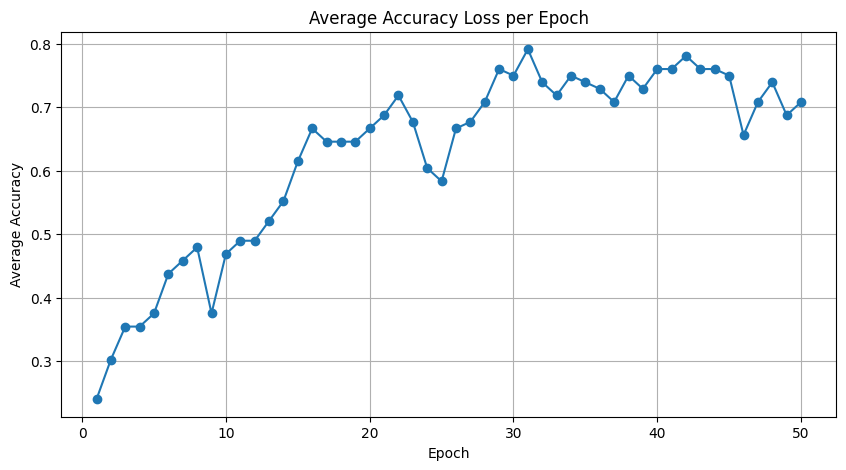

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), epoch_losses, marker='o')
plt.title('Average Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), content_losses, marker='o')
plt.title('Average Content Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), emotion_losses, marker='o')
plt.title('Average Emotion Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Emotion Loss')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), mse_losses, marker='o')
plt.title('Average MSE Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average MSE Loss')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), accuracies, marker='o')
plt.title('Average Accuracy Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Accuracy')
plt.grid(True)
plt.show()

In [25]:
torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': total_loss,
            }, 'checkpoint.pth')

[NeMo W 2024-04-29 04:27:58 nemo_logging:349] <ipython-input-29-4465e854ac6a>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
      model_tensor = torch.tensor(spectrogram, dtype=torch.float32)
    
[NeMo W 2024-04-29 04:28:01 modelPT:165] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/train_finetune.txt
      min_duration: 0.75
      n_segments: 8192
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 64
      num_workers: 4
    
[NeMo W 2024-04-29 04:28:01 modelPT:172] If you intend to do validation, please call the ModelPT.setup_validation_d

[NeMo I 2024-04-29 04:28:01 features:289] PADDING: 0


[NeMo W 2024-04-29 04:28:01 features:266] Using torch_stft is deprecated and has been removed. The values have been forcibly set to False for FilterbankFeatures and AudioToMelSpectrogramPreprocessor. Please set exact_pad to True as needed.


[NeMo I 2024-04-29 04:28:01 features:289] PADDING: 0
[NeMo I 2024-04-29 04:28:03 save_restore_connector:249] Model HifiGanModel was successfully restored from /root/.cache/huggingface/hub/models--nvidia--tts_hifigan/snapshots/3ba1fed954276287015654bf4c78060ffc9a4772/tts_hifigan.nemo.


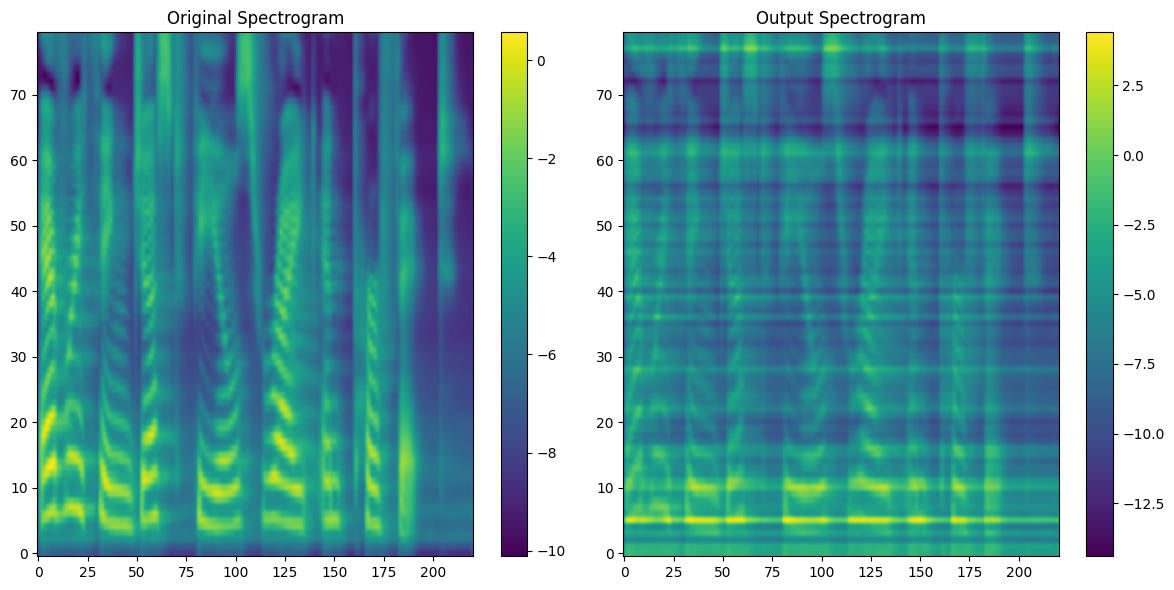

In [29]:
model.eval()
model_saved_load = np.load('spect_output/spectrogram_48.npy')

padding_size = 374 - model_saved_load.shape[2]
spectrogram = torch.nn.functional.pad(torch.from_numpy(model_saved_load), (0, padding_size), 'constant', 0).cuda()

model_tensor = torch.tensor(spectrogram, dtype=torch.float32)
emotion_label = torch.tensor(1, dtype=torch.long).cuda()
output = model(model_tensor, emotion_label)
output = torch.squeeze(output).unsqueeze(dim=0).cuda()

vocoder = HifiGanModel.from_pretrained(model_name="nvidia/tts_hifigan")
vocoder.eval()

import soundfile as sf

output = output[:, :, :221]
waveform = vocoder.convert_spectrogram_to_audio(spec=output)
sf.write('spect_output/test1.wav', waveform.squeeze().cpu().detach().numpy(), 22050)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Spectrogram')
plt.imshow(model_saved_load.squeeze(), aspect='auto', origin='lower')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('Output Spectrogram')
output_np = output.squeeze().detach().cpu().numpy()
output_np = output_np[:, :model_saved_load.shape[2]]
plt.imshow(output_np, aspect='auto', origin='lower')
plt.colorbar()

plt.tight_layout()
plt.show()

In [ ]:
emotion_rec.eval()

norm_wav = (waveform - mean) / (std)
mask = torch.ones(norm_wav.shape).cuda()

# with torch.no_grad():
pred = emotion_rec(norm_wav.cuda(), mask)
print(pred)

tensor([[-1.2161,  3.3272,  0.8440, -0.1591,  0.0327, -2.3735, -1.1887,  2.9310]],
       device='cuda:0', grad_fn=<AddmmBackward0>)


In [ ]:
import os
import torch
import torchaudio
from transformers import AutoProcessor, AutoModelForCTC
import pandas as pd
import numpy as np

checkpoint = "bookbot/wav2vec2-ljspeech-gruut"
model = AutoModelForCTC.from_pretrained(checkpoint)
processor = AutoProcessor.from_pretrained(checkpoint)
sr_target = 16000

def process_audio(file_path):
    audio_array, orig_sr = torchaudio.load(file_path)
    if orig_sr != sr_target:
        resampler = torchaudio.transforms.Resample(22050, sr_target)
        audio_array = resampler(audio_array)
    inputs = processor(audio_array.squeeze(0), return_tensors="pt", padding=True)
    with torch.no_grad():
        output = model(inputs["input_values"])
        logits = output.logits
    return torch.argmax(logits, dim=-1)
input_dir = "tts_output"
output_dir = "wav2vec2_outputs"
os.makedirs(output_dir, exist_ok=True)

df = pd.DataFrame(columns=["Path"])

for filename in os.listdir(input_dir):
    if filename.startswith("output_") and filename.endswith(".wav"):
        file_path = os.path.join(input_dir, filename)
        print(f"Processing: {file_path}")
        predicted_ids = process_audio(file_path)

        print(f"Shape of {filename.replace('.wav', '.npy')}: {predicted_ids.shape}")

        output_filename = filename.replace(".wav", ".npy")
        output_path = os.path.join(output_dir, output_filename)
        np.save(output_path, predicted_ids.numpy())

        df = df._append({"Path": output_path}, ignore_index=True)

df.to_excel("wav2vec2_outputs/output_paths.xlsx", index=False)

print("All files processed and paths saved to Excel.")


Some weights of the model checkpoint at bookbot/wav2vec2-ljspeech-gruut were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at bookbot/wav2vec2-ljspeech-gruut and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN thi

Processing: tts_output/output_1.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_1.npy: torch.Size([1, 209])
Processing: tts_output/output_2.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_2.npy: torch.Size([1, 183])
Processing: tts_output/output_3.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_3.npy: torch.Size([1, 186])
Processing: tts_output/output_4.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_4.npy: torch.Size([1, 249])
Processing: tts_output/output_5.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_5.npy: torch.Size([1, 178])
Processing: tts_output/output_6.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_6.npy: torch.Size([1, 183])
Processing: tts_output/output_7.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_7.npy: torch.Size([1, 176])
Processing: tts_output/output_8.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_8.npy: torch.Size([1, 163])
Processing: tts_output/output_9.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_9.npy: torch.Size([1, 206])
Processing: tts_output/output_10.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_10.npy: torch.Size([1, 247])
Processing: tts_output/output_11.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_11.npy: torch.Size([1, 186])
Processing: tts_output/output_12.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_12.npy: torch.Size([1, 249])
Processing: tts_output/output_13.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_13.npy: torch.Size([1, 229])
Processing: tts_output/output_14.wav
Shape of output_14.npy: torch.Size([1, 163])
Processing: tts_output/output_15.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_15.npy: torch.Size([1, 256])
Processing: tts_output/output_16.wav
Shape of output_16.npy: torch.Size([1, 143])
Processing: tts_output/output_17.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_17.npy: torch.Size([1, 181])
Processing: tts_output/output_18.wav
Shape of output_18.npy: torch.Size([1, 158])
Processing: tts_output/output_19.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_19.npy: torch.Size([1, 196])
Processing: tts_output/output_20.wav
Shape of output_20.npy: torch.Size([1, 176])
Processing: tts_output/output_21.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_21.npy: torch.Size([1, 176])
Processing: tts_output/output_22.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_22.npy: torch.Size([1, 224])
Processing: tts_output/output_23.wav
Shape of output_23.npy: torch.Size([1, 191])
Processing: tts_output/output_24.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_24.npy: torch.Size([1, 171])
Processing: tts_output/output_25.wav
Shape of output_25.npy: torch.Size([1, 171])


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Processing: tts_output/output_26.wav
Shape of output_26.npy: torch.Size([1, 168])
Processing: tts_output/output_27.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_27.npy: torch.Size([1, 183])
Processing: tts_output/output_28.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_28.npy: torch.Size([1, 219])
Processing: tts_output/output_29.wav
Shape of output_29.npy: torch.Size([1, 201])


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Processing: tts_output/output_30.wav
Shape of output_30.npy: torch.Size([1, 161])
Processing: tts_output/output_31.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_31.npy: torch.Size([1, 252])
Processing: tts_output/output_32.wav
Shape of output_32.npy: torch.Size([1, 194])
Processing: tts_output/output_33.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_33.npy: torch.Size([1, 213])
Processing: tts_output/output_34.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_34.npy: torch.Size([1, 221])
Processing: tts_output/output_35.wav
Shape of output_35.npy: torch.Size([1, 140])
Processing: tts_output/output_36.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_36.npy: torch.Size([1, 206])
Processing: tts_output/output_37.wav
Shape of output_37.npy: torch.Size([1, 133])
Processing: tts_output/output_38.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_38.npy: torch.Size([1, 171])
Processing: tts_output/output_39.wav
Shape of output_39.npy: torch.Size([1, 171])
Processing: tts_output/output_40.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_40.npy: torch.Size([1, 151])
Processing: tts_output/output_41.wav
Shape of output_41.npy: torch.Size([1, 198])
Processing: tts_output/output_42.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_42.npy: torch.Size([1, 213])
Processing: tts_output/output_43.wav
Shape of output_43.npy: torch.Size([1, 176])
Processing: tts_output/output_44.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_44.npy: torch.Size([1, 161])
Processing: tts_output/output_45.wav
Shape of output_45.npy: torch.Size([1, 143])
Processing: tts_output/output_46.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_46.npy: torch.Size([1, 209])
Processing: tts_output/output_47.wav
Shape of output_47.npy: torch.Size([1, 153])
Processing: tts_output/output_48.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_48.npy: torch.Size([1, 130])
Processing: tts_output/output_49.wav
Shape of output_49.npy: torch.Size([1, 158])
Processing: tts_output/output_50.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_50.npy: torch.Size([1, 151])
Processing: tts_output/output_51.wav
Shape of output_51.npy: torch.Size([1, 153])
Processing: tts_output/output_52.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_52.npy: torch.Size([1, 183])
Processing: tts_output/output_53.wav
Shape of output_53.npy: torch.Size([1, 181])
Processing: tts_output/output_54.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_54.npy: torch.Size([1, 135])
Processing: tts_output/output_55.wav
Shape of output_55.npy: torch.Size([1, 158])
Processing: tts_output/output_56.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_56.npy: torch.Size([1, 181])
Processing: tts_output/output_57.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_57.npy: torch.Size([1, 189])
Processing: tts_output/output_58.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_58.npy: torch.Size([1, 178])
Processing: tts_output/output_59.wav
Shape of output_59.npy: torch.Size([1, 130])
Processing: tts_output/output_60.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_60.npy: torch.Size([1, 146])
Processing: tts_output/output_61.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_61.npy: torch.Size([1, 171])
Processing: tts_output/output_62.wav
Shape of output_62.npy: torch.Size([1, 153])


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Processing: tts_output/output_63.wav
Shape of output_63.npy: torch.Size([1, 194])


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Processing: tts_output/output_64.wav
Shape of output_64.npy: torch.Size([1, 151])
Processing: tts_output/output_65.wav
Shape of output_65.npy: torch.Size([1, 158])


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Processing: tts_output/output_66.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_66.npy: torch.Size([1, 153])
Processing: tts_output/output_67.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_67.npy: torch.Size([1, 201])
Processing: tts_output/output_68.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_68.npy: torch.Size([1, 135])
Processing: tts_output/output_69.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_69.npy: torch.Size([1, 135])
Processing: tts_output/output_70.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_70.npy: torch.Size([1, 168])
Processing: tts_output/output_71.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_71.npy: torch.Size([1, 181])
Processing: tts_output/output_72.wav
Shape of output_72.npy: torch.Size([1, 143])
Processing: tts_output/output_73.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_73.npy: torch.Size([1, 146])
Processing: tts_output/output_74.wav
Shape of output_74.npy: torch.Size([1, 138])
Processing: tts_output/output_75.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_75.npy: torch.Size([1, 120])
Processing: tts_output/output_76.wav
Shape of output_76.npy: torch.Size([1, 173])
Processing: tts_output/output_77.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_77.npy: torch.Size([1, 146])
Processing: tts_output/output_78.wav
Shape of output_78.npy: torch.Size([1, 161])
Processing: tts_output/output_79.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_79.npy: torch.Size([1, 135])
Processing: tts_output/output_80.wav
Shape of output_80.npy: torch.Size([1, 125])
Processing: tts_output/output_81.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_81.npy: torch.Size([1, 161])
Processing: tts_output/output_82.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_82.npy: torch.Size([1, 204])
Processing: tts_output/output_83.wav
Shape of output_83.npy: torch.Size([1, 209])
Processing: tts_output/output_84.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_84.npy: torch.Size([1, 171])
Processing: tts_output/output_85.wav
Shape of output_85.npy: torch.Size([1, 163])


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Processing: tts_output/output_86.wav
Shape of output_86.npy: torch.Size([1, 161])
Processing: tts_output/output_87.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_87.npy: torch.Size([1, 189])
Processing: tts_output/output_88.wav
Shape of output_88.npy: torch.Size([1, 166])
Processing: tts_output/output_89.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_89.npy: torch.Size([1, 161])
Processing: tts_output/output_90.wav
Shape of output_90.npy: torch.Size([1, 209])


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Processing: tts_output/output_91.wav
Shape of output_91.npy: torch.Size([1, 198])
Processing: tts_output/output_92.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_92.npy: torch.Size([1, 166])
Processing: tts_output/output_93.wav
Shape of output_93.npy: torch.Size([1, 181])
Processing: tts_output/output_94.wav


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Shape of output_94.npy: torch.Size([1, 178])
Processing: tts_output/output_95.wav
Shape of output_95.npy: torch.Size([1, 123])
Processing: tts_output/output_96.wav
Shape of output_96.npy: torch.Size([1, 95])
All files processed and paths saved to Excel.
